# Yelp Data Cleaning
This script imports, cleans, and filters variables for input into a regression model to predict median home price for a neighborhood. 
data source: https://www.yelp.com/dataset/download

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# Set working directory
project_dir = os.getcwd()
yelp_dir = os.path.join(project_dir, 'data', 'yelp_dataset')

## Business dataset

In [3]:
# Load business dataset
business_df = pd.read_json(os.path.join(yelp_dir, 'business.json'), lines=True)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


My intention was to use the wikipedia table to limit my results to cities with high density becuase these are areas that are more prone to neighborhood change. However, my sample size ended up being so small once I joined the Yelp data with the Zillow data that I had to use all of my data.  

In [5]:
# Load table for most populated cities in these states
pop = pd.read_csv('/Users/AuerPower/Metis/git/predict_gentrification_with_yelp/data/most_populous_cities.csv')
pop = pop.sort_values(by='population_density_sqmi', ascending=False)
pop = pop[pop['rank']<=50]
#pop = pop.iloc[:50]

In [ ]:
# Select top 50 most populous cities for dataset
#business_df  = business_df[business_df['city'].isin(pop['City'])]

In [6]:
business_df.city.unique()

array(['Phoenix', 'Mississauga', 'Charlotte', ..., 'Henderson Nevada',
       'Boston', 'Spring Hill City View'], dtype=object)

In [7]:
business_df.shape

(192609, 14)

In [8]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


### Total number of businesses per zip

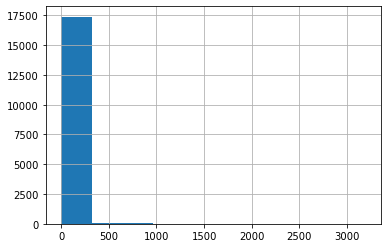

In [9]:
total_business = business_df.groupby(['postal_code'])['business_id'].count()
total_business.hist()

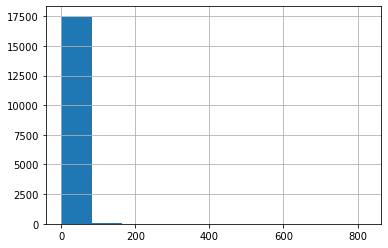

In [10]:
### Number of closed businesses per zip
closed_businesses = business_df.groupby('postal_code')['is_open'].apply(lambda x: (x==0).sum())
closed_businesses.hist()

In [12]:
open_business = (total_business-closed_businesses)/total_business
open_business

postal_code
           0.918058
02645      1.000000
05440      1.000000
06032      1.000000
06280      1.000000
             ...   
V0J        0.000000
V5H 1J9    1.000000
W8M 3T5    0.000000
m2k 0c5    1.000000
t2g 3m5    1.000000
Length: 17541, dtype: float64

### Average number of yelp reviews per business

In [13]:
# groupby postal_code and find mean of review_count
reviews_per_business = business_df.groupby(['postal_code']).mean().review_count
reviews_per_business

postal_code
             9.100152
02645        4.000000
05440        4.000000
06032        9.000000
06280        3.000000
              ...    
V0J         10.000000
V5H 1J9    373.000000
W8M 3T5     20.000000
m2k 0c5      3.000000
t2g 3m5      3.000000
Name: review_count, Length: 17541, dtype: float64

### Average number of stars per business

In [14]:
# groupby postal_code and find mean of stars
avg_stars = business_df.groupby(['postal_code']).mean().stars
avg_stars

postal_code
           3.358877
02645      5.000000
05440      4.250000
06032      4.000000
06280      5.000000
             ...   
V0J        4.500000
V5H 1J9    3.500000
W8M 3T5    4.000000
m2k 0c5    4.500000
t2g 3m5    5.000000
Name: stars, Length: 17541, dtype: float64

### Number of unique catgories of business

In [15]:
total_possible_categories = business_df.categories.nunique()
categories = business_df.groupby('postal_code')['categories'].nunique()
categories = categories/total_possible_categories
# did this work? what is the number of unique catgories for zip '28210'
categories.loc['85308']

0.013524655994003319

### Sushi

In [16]:
business_df['sushi'] = business_df['categories'].str.contains('Sushi Bars', regex=True)
business_df['sushi'] = business_df['sushi'].replace({False: 0, True: 1})
sushi = business_df.groupby('postal_code').sum().iloc[:,-1]
sushi.loc['85308']

14.0

In [17]:
sushi[sushi == 20]

postal_code
89102    20.0
Name: sushi, dtype: float64

In [18]:
### New American Restaurants
business_df['New_american'] = business_df['categories'].str.contains('American (New)', regex=True)
business_df['New_american'] = business_df['New_american'].replace({False: 0, True: 1})
New_american = business_df.groupby('postal_code').sum().iloc[:,-1]
New_american.loc['85308']

/Users/AuerPower/opt/miniconda3/envs/metis/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


14.0

### Number of wine bars/cocktail bars/breweries

In [19]:
business_df['bars'] = business_df['categories'].str.contains('Wine Bars|Cocktail Bars|Breweries|Brewpubs', regex=True)
business_df['bars'] = business_df['bars'].replace({False: 0, True: 1})
bars = business_df.groupby('postal_code').sum().bars #iloc[:,-1]
bars.loc['85308']

11.0

### Number of coffee shops

In [20]:
business_df['coffee'] = business_df['categories'].str.contains('Coffee & Tea|Coffee Roasteries|Bakeries|Ice Cream', regex=True)
business_df['coffee'] = business_df['coffee'].replace({False: 0, True: 1})
coffee = business_df.groupby('postal_code').sum().coffee #.iloc[:,-1]
coffee.loc['85308']

62.0

### Yoga studios

In [21]:
business_df['yoga'] = business_df['categories'].str.contains('Fitness & Instruction|Active Life|Yoga', regex=True)
business_df['yoga'] = business_df['yoga'].replace({False: 0, True: 1})
yoga = business_df.groupby('postal_code').sum().yoga #.iloc[:,-1]
yoga.loc['85308']

66.0

## Photo data

In [22]:
# Load yelp photo data
photo_df = pd.read_json(os.path.join(yelp_dir, 'photo.json'), lines=True)
photo_df.head()

,caption,photo_id,business_id,label
0,,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside
1,,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside
2,,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,food
3,,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,inside
4,,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,inside


### Identify third wave coffee shops
Third wave coffee shops are defined as having direct trade sourcing, innovative brewing methods, and a smooth type of foam that creates decorative patterns when poured (i.e. latte art). To identify third wave coffee shops I'm going to choose businesses that have photo captions with terms associated with these characteristics:
* latte art
* avocado toast
* single origin
* brewing methods: chemex, V60, AeroPress, vac pot syphon

In [23]:
# join with bussiness df so you can group by zip code
photo_df = photo_df.merge(business_df, how ='right', on = 'business_id')
photo_df.head()

,caption,photo_id,business_id,label,name,address,city,state,postal_code,latitude,...,review_count,is_open,attributes,categories,hours,sushi,New_american,bars,coffee,yoga
0,,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside,Bouchon,"3355 Las Vegas Blvd S, Venezia Tower, 10th floor",Las Vegas,NV,89109,36.120955,...,3859,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","French, Bars, Cocktail Bars, Nightlife, Breakf...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",0.0,0,1.0,0.0,0.0
1,,-8vsof7QTBM_eb8bONG6uQ,rcaPajgKOJC2vo_l3xa42A,inside,Bouchon,"3355 Las Vegas Blvd S, Venezia Tower, 10th floor",Las Vegas,NV,89109,36.120955,...,3859,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","French, Bars, Cocktail Bars, Nightlife, Breakf...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",0.0,0,1.0,0.0,0.0
2,Poitrine de Veau (Slow Cooked Veil) $29.50,8bITdFwTRU6IaqY04Ij-3g,rcaPajgKOJC2vo_l3xa42A,food,Bouchon,"3355 Las Vegas Blvd S, Venezia Tower, 10th floor",Las Vegas,NV,89109,36.120955,...,3859,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","French, Bars, Cocktail Bars, Nightlife, Breakf...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",0.0,0,1.0,0.0,0.0
3,Bouchon Coffee,SCqix5R76QSnWvEF-ut3YA,rcaPajgKOJC2vo_l3xa42A,drink,Bouchon,"3355 Las Vegas Blvd S, Venezia Tower, 10th floor",Las Vegas,NV,89109,36.120955,...,3859,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","French, Bars, Cocktail Bars, Nightlife, Breakf...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",0.0,0,1.0,0.0,0.0
4,,tT55LOeWKCOwRJ04x9ueEw,rcaPajgKOJC2vo_l3xa42A,inside,Bouchon,"3355 Las Vegas Blvd S, Venezia Tower, 10th floor",Las Vegas,NV,89109,36.120955,...,3859,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","French, Bars, Cocktail Bars, Nightlife, Breakf...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",0.0,0,1.0,0.0,0.0


### Total number of photos per business

In [25]:
#mean_photo = photo_df.groupby(['postal_code', 'business_id']).count()
total_photo = photo_df.groupby('postal_code').count().photo_id
total_photo

postal_code
           30
02645       0
05440       0
06032       0
06280       0
           ..
V0J         0
V5H 1J9    10
W8M 3T5     1
m2k 0c5     0
t2g 3m5     0
Name: photo_id, Length: 17541, dtype: int64

In [ ]:
# Select records that have a photo caption
#photo_df = photo_df.replace(r'^\s*$', np.nan, regex=True)
#photo_df = photo_df.dropna(subset=['caption'])
#photo_df.head()

In [26]:
# Select records that have one of the key terms that indicate third wave
photo_df['avocado'] = photo_df['caption'].str.contains(
    'avocado toast|latte art|pour over|single origin|house made|chemex|V60|AeroPress|vac pot syphon', case=False, regex=True)
photo_df['avocado'] = photo_df['avocado'].replace({False: 0, True: 1})
avocado = photo_df.groupby('postal_code').sum().avocado
avocado.loc['85308']

2.0

### Bring variables together into one dataset

In [28]:
from functools import reduce, partial
# lump food variables into disposable income category
adder = partial(pd.Series.add, fill_value=0)
dis_income = reduce(adder, [sushi, New_american, bars, coffee, yoga, avocado])

In [33]:
frame = {'open_business': open_business,'reviews_per_business': reviews_per_business, 
         'avg_stars': avg_stars,'categories': categories, 'dis_income': dis_income, 
         'total_photo': total_photo}

final_df = pd.DataFrame(frame)
final_df

,open_business,reviews_per_business,avg_stars,categories,dis_income,total_photo
postal_code,,,,,,
,0.918058,9.100152,3.358877,0.005483,77.0,30
02645,1.000000,4.000000,5.000000,0.000011,1.0,0
05440,1.000000,4.000000,4.250000,0.000021,0.0,0
06032,1.000000,9.000000,4.000000,0.000011,0.0,0
06280,1.000000,3.000000,5.000000,0.000011,0.0,0
...,...,...,...,...,...,...
V0J,0.000000,10.000000,4.500000,0.000011,0.0,0
V5H 1J9,1.000000,373.000000,3.500000,0.000011,1.0,10
W8M 3T5,0.000000,20.000000,4.000000,0.000011,1.0,1


In [34]:
# get rid of first row summary
final_df = final_df.iloc[1:]
final_df = final_df.reset_index()
final_df

,postal_code,open_business,reviews_per_business,avg_stars,categories,dis_income,total_photo
0,02645,1.0,4.0,5.00,0.000011,1.0,0
1,05440,1.0,4.0,4.25,0.000021,0.0,0
2,06032,1.0,9.0,4.00,0.000011,0.0,0
3,06280,1.0,3.0,5.00,0.000011,0.0,0
4,06759,1.0,3.0,1.50,0.000011,0.0,0
...,...,...,...,...,...,...,...
17535,V0J,0.0,10.0,4.50,0.000011,0.0,0
17536,V5H 1J9,1.0,373.0,3.50,0.000011,1.0,10
17537,W8M 3T5,0.0,20.0,4.00,0.000011,1.0,1
17538,m2k 0c5,1.0,3.0,4.50,0.000011,1.0,0


In [35]:
final_df.to_csv('data/yelp_predictors.csv')